# Explore here

In [113]:
# Your code here
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Preprocessing --------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
# Exporting ------------------------------------------------------------
import pickle

In [92]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('../data/raw/coffee.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
257,2,114,68,22,0,28.7,0.092,25,0
34,10,122,78,31,0,27.6,0.512,45,0
394,4,158,78,0,0,32.9,0.803,31,1
383,1,90,62,18,59,25.1,1.268,25,0
203,2,99,70,16,44,20.4,0.235,27,0
305,2,120,76,37,105,39.7,0.215,29,0
289,5,108,72,43,75,36.1,0.263,33,0
594,6,123,72,45,230,33.6,0.733,34,0
411,1,112,72,30,176,34.4,0.528,25,0
648,11,136,84,35,130,28.3,0.260,42,1


In [94]:
# 1.2 Transform data
# Select metrics
df_interim = df_raw.copy()
#Costumize
df_interim = df_interim.dropna()
df_interim['Outcome'] = pd.Categorical(df_interim['Outcome'])
df_interim.to_csv('../data/interim/coffee_model_interim.csv')
df = df_interim.copy()

In [95]:
# 3. EDA
# 3.1 Create train and test subsets

X = df.copy().drop(['Outcome'], axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=2007)
df_train = pd.concat([X_train,y_train], axis=1)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 12 to 572
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               576 non-null    int64   
 1   Glucose                   576 non-null    int64   
 2   BloodPressure             576 non-null    int64   
 3   SkinThickness             576 non-null    int64   
 4   Insulin                   576 non-null    int64   
 5   BMI                       576 non-null    float64 
 6   DiabetesPedigreeFunction  576 non-null    float64 
 7   Age                       576 non-null    int64   
 8   Outcome                   576 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 41.2 KB


In [97]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,NaN,NaN,NaN,3.916667,3.376646,0.000,1.00000,3.0000,6.00000,15.00
Glucose,576.0,NaN,NaN,NaN,120.470486,31.852691,0.000,99.00000,117.0000,140.00000,199.00
BloodPressure,576.0,NaN,NaN,NaN,69.664931,19.303090,0.000,64.00000,72.0000,80.00000,122.00
SkinThickness,576.0,NaN,NaN,NaN,20.295139,15.773606,0.000,0.00000,23.0000,32.00000,63.00
Insulin,576.0,NaN,NaN,NaN,76.717014,107.001169,0.000,0.00000,18.0000,126.00000,680.00
BMI,576.0,NaN,NaN,NaN,32.050694,8.078261,0.000,27.40000,32.3000,36.80000,67.10
DiabetesPedigreeFunction,576.0,NaN,NaN,NaN,0.471524,0.335873,0.078,0.23775,0.3725,0.61325,2.42
Age,576.0,NaN,NaN,NaN,33.322917,11.659662,21.000,24.00000,29.0000,41.00000,72.00
Outcome,576.0,2.0,0.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


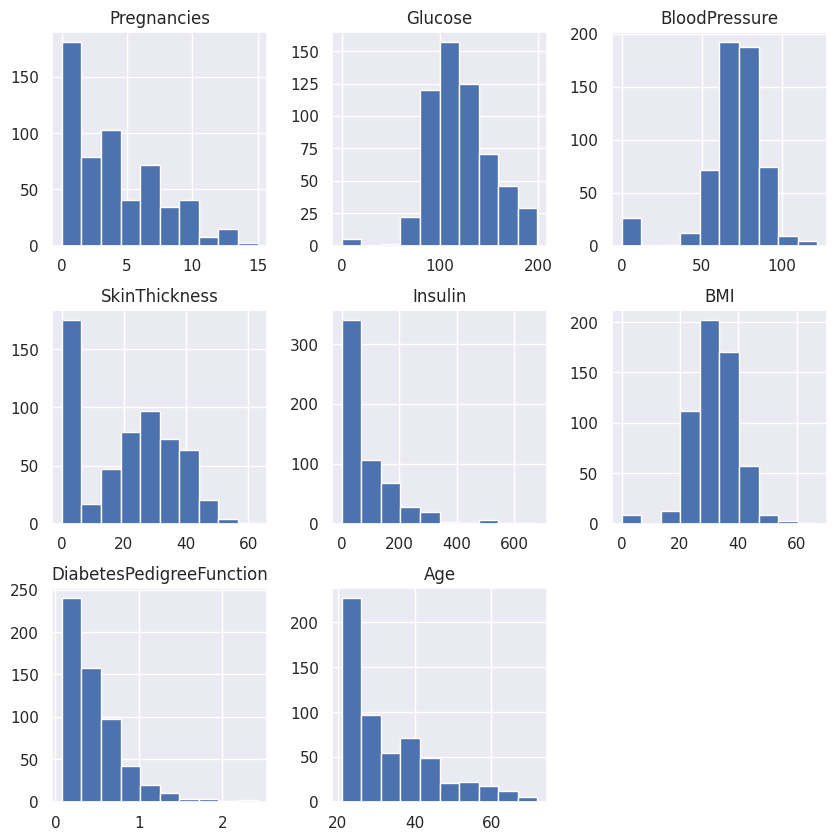

In [98]:
df_train.hist(figsize=(10,10))
plt.show()

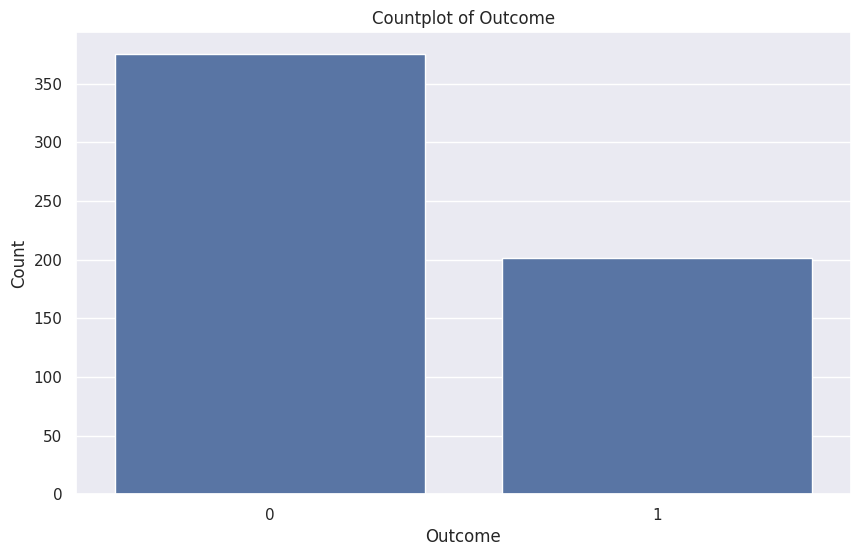

In [99]:
sns.set(style="darkgrid")  # Set the style, if needed
plt.figure(figsize=(10, 6))  # Set the figure size, if needed
sns.countplot(data=df_train, x="Outcome", order=df_train["Outcome"].value_counts().index)

# Label the axes and add a title
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Countplot of Outcome")

# Show the plot
plt.show()

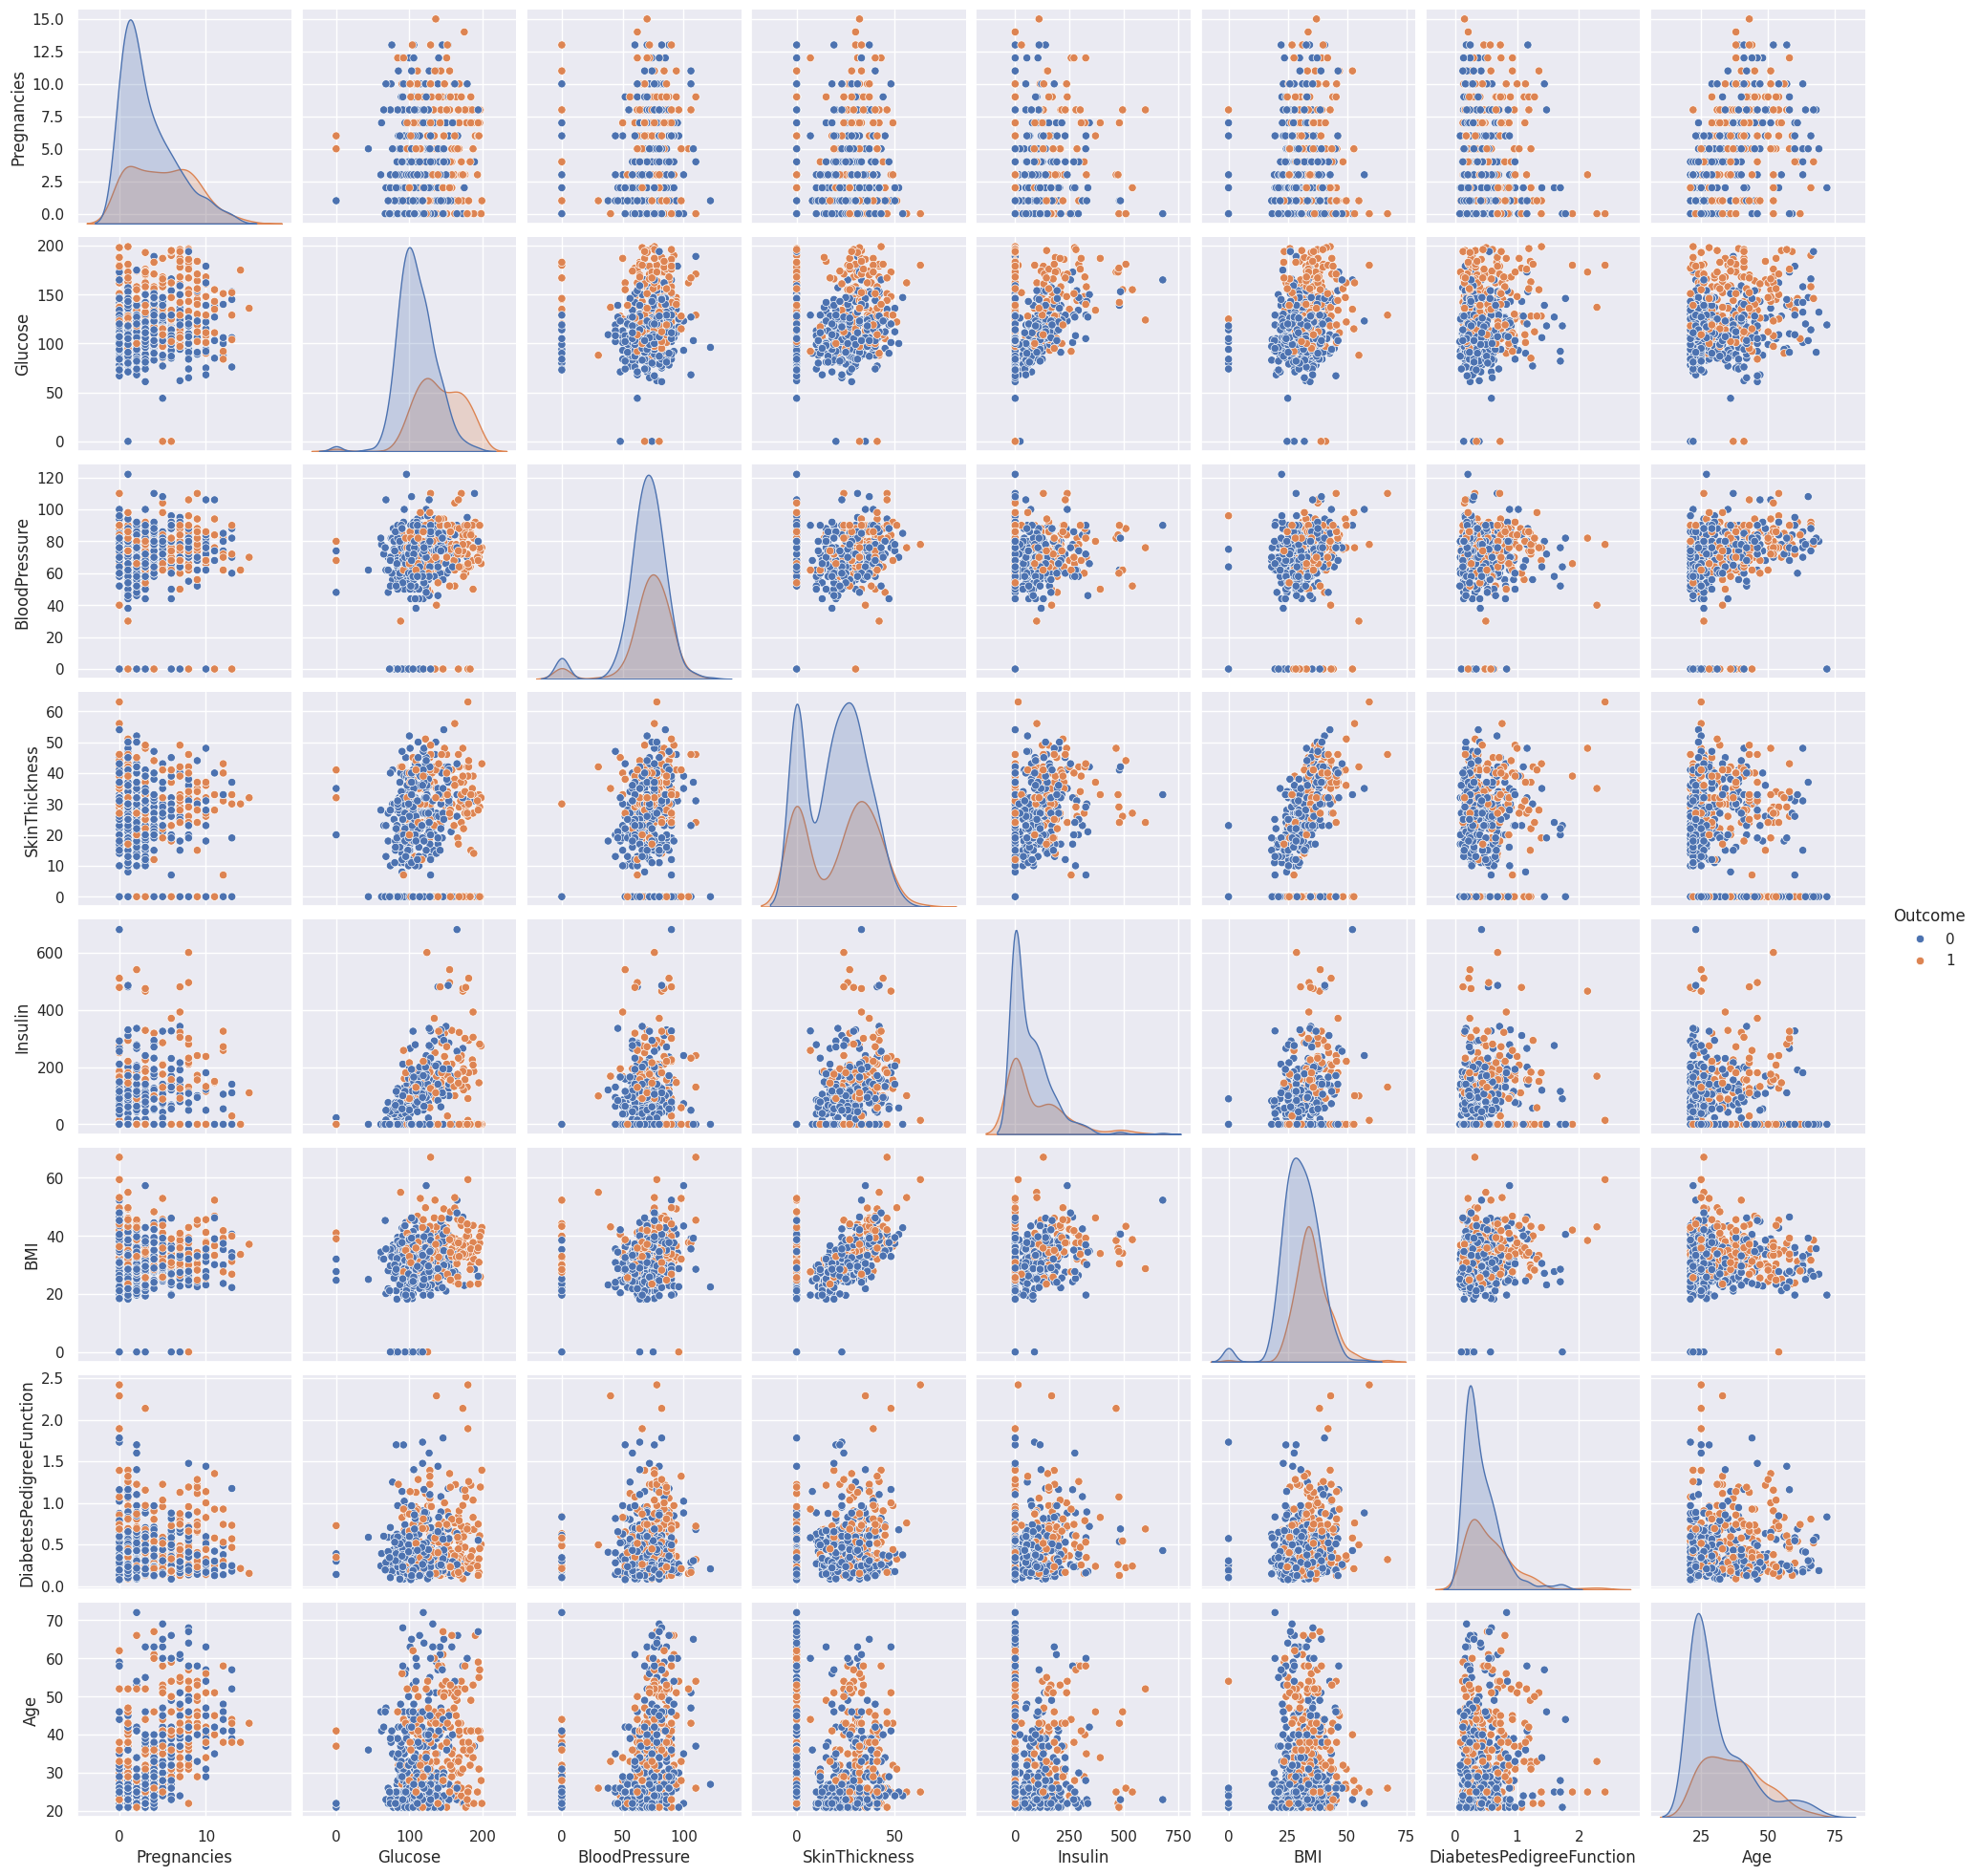

In [100]:
sns.pairplot(data=df_train, hue='Outcome')
plt.show()

In [101]:
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.147460,0.104138,-0.113103,-0.088359,0.012913,-0.045057,0.566678
Glucose,0.147460,1.000000,0.157186,0.044971,0.279266,0.240103,0.157412,0.263327
BloodPressure,0.104138,0.157186,1.000000,0.212057,0.102865,0.300065,0.061802,0.245061
SkinThickness,-0.113103,0.044971,0.212057,1.000000,0.468122,0.406044,0.207414,-0.168319
Insulin,-0.088359,0.279266,0.102865,0.468122,1.000000,0.228866,0.174091,-0.090108
BMI,0.012913,0.240103,0.300065,0.406044,0.228866,1.000000,0.167649,0.048939
DiabetesPedigreeFunction,-0.045057,0.157412,0.061802,0.207414,0.174091,0.167649,1.000000,0.022580
Age,0.566678,0.263327,0.245061,-0.168319,-0.090108,0.048939,0.022580,1.000000


In [102]:
# 4. Model training and prediction
cat_cols = X_train.select_dtypes('category').columns
num_cols = X_train.select_dtypes('number').columns

#4.1 Create pipeline
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [103]:
#DecisionTree
dtree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth = 5, class_weight='balanced'))
])
dtree.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       125
           1       0.57      0.72      0.64        67

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.71      0.72       192



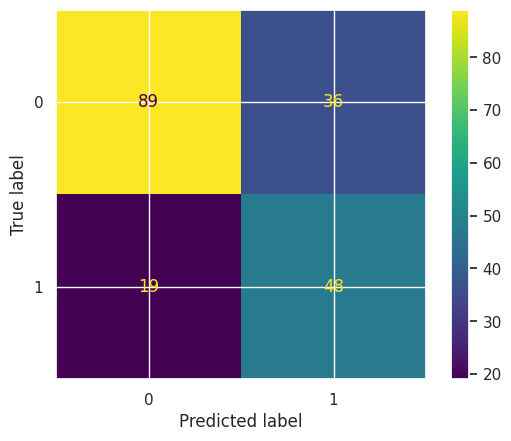

In [104]:
y_hat = dtree.predict(X_test)
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=dtree.classes_).plot()
plt.show()

In [105]:
#RandomForest
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       125
           1       0.67      0.57      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.74      0.75      0.74       192



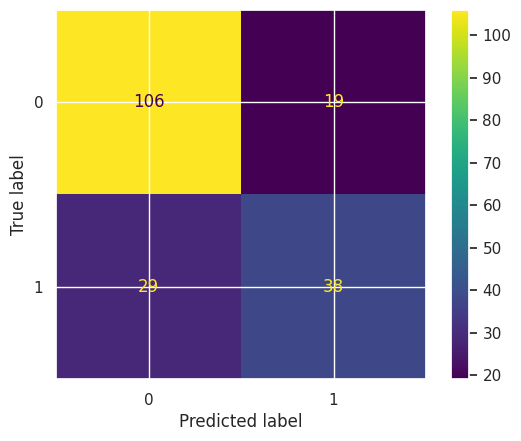

In [106]:
y_hat = rf.predict(X_test)
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=rf.classes_).plot()
plt.show()

In [107]:
#Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',
                           verbose=2,  # Verbosity level (optional)
                           n_jobs=-1)  # Use all available CPU cores for parallel processing (optional)



In [108]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [111]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [114]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 0.7552083333333334


In [109]:
dboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(class_weight='balanced'))
])
dboost.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/vscode/.local/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/vscode/.local/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/vscode/.local/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:23:49] WARNING: /work

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('classifi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       125
           1       0.58      0.63      0.60        67

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.71      0.72       192



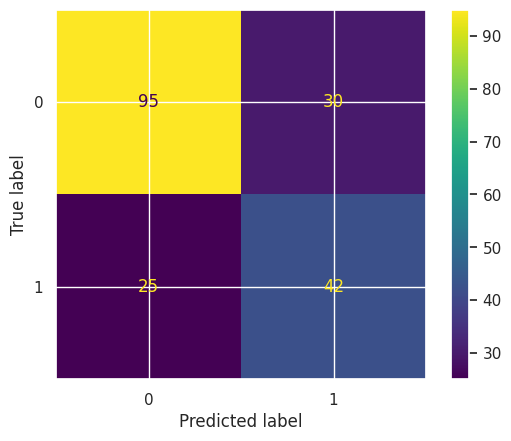

In [110]:
y_hat = dboost.predict(X_test)
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=dboost.classes_).plot()
plt.show()